In [81]:
#Задание 1. Начните исследование

In [82]:
#Шаг 1. Откройте файл с данными и изучите общую информацию
#Путь к файлу: /datasets/real_estate_data.csv
import pandas as pd
df =pd.read_csv('real_estate_data.csv')

In [83]:
#Шаг 2. Подготовьте данные
#определите и заполните пропущенные значения;
#Посмотрим информацию по данным
print(df.info())
print(df.head())
print()
print('С такими данными невозможно работать, поменяем разделитель')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
building_series_id	total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	area	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.2+ KB
None
  building_series_id\ttotal_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\tarea\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  1564812\t20\t13000000.0\t108.0\t2019-03-07T00:...                                                                                                                       

In [84]:
df = pd.read_csv('real_estate_data.csv', sep='\t')
print(df.info())
print(df.head())
print()
print('Так намного лучще, пропущенные значения в столбцах:')
print('building_series_id, ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name,')
print('airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

In [85]:
#Столбцов много, поэтому все не отоюражаются, распечатаем все стобцы
pd.set_option('display.max_columns', None)
print(df.head())

  building_series_id  total_images  last_price  total_area  \
0            1564812            20  13000000.0       108.0   
1                NaN             7   3350000.0        40.4   
2         Сталинский            10   5196000.0        56.0   
3                NaN             0  64900000.0       159.0   
4                NaN             2  10000000.0       100.0   

  first_day_exposition  rooms  ceiling_height  floors_total  living_area  \
0  2019-03-07T00:00:00      3            2.70          16.0         51.0   
1  2018-12-04T00:00:00      1             NaN          11.0         18.6   
2  2015-08-20T00:00:00      2             NaN           5.0         34.3   
3  2015-07-24T00:00:00      3             NaN          14.0          NaN   
4  2018-06-19T00:00:00      2            3.03          14.0         32.0   

   floor is_apartment  studio   area  open_plan  kitchen_area  balcony  \
0      8          NaN   False  108.0      False          25.0      NaN   
1      1          NaN 

In [86]:
#Заполнять пропущенные значения будем по столбцам где все значения присутствуют
print('Столбцы без пропусков: total_images, last_price, total_area, first_day_exposition, rooms, floor, studio, area, open_plan')

Столбцы без пропусков: total_images, last_price, total_area, first_day_exposition, rooms, floor, studio, area, open_plan


In [87]:
#building_series_id      6517 non-null object - тип дома
#заменим пропущенные значения на "без типа"
df['building_series_id'] = df['building_series_id'].fillna('без типа')

пик находится на 2.5м, но так же много квартир где высота от 2.5м до 3.0м, пропущенные значения заменим на медиану:
2.65


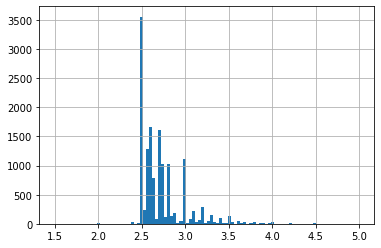

In [88]:
#ceiling_height          14504 non-null float64 - высота потолков (м)
df['ceiling_height'].hist(bins=100, range=(1.5, 5))
print('пик находится на 2.5м, но так же много квартир где высота от 2.5м до 3.0м, пропущенные значения заменим на медиану:')
height_median = df['ceiling_height'].median()
print(height_median)
df['ceiling_height'] = df['ceiling_height'].fillna(height_median)

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]
Наиболее популярны 5, 9, 17 и 25 этажные здания


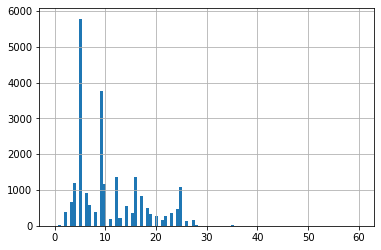

In [89]:
#floors_total            23613 non-null float64 - всего этажей в доме
df['floors_total'].hist(bins=100, range=(0, 60))
print(df['floors_total'].unique())
print('Наиболее популярны 5, 9, 17 и 25 этажные здания')

In [90]:
df.dropna(subset = ['floors_total'], inplace = True)

print('Так как пропусков в данной графе меньше 1% то мы можем смело удалить данные с этими пропусками')

Так как пропусков в данной графе меньше 1% то мы можем смело удалить данные с этими пропусками


In [91]:
#locality_name           23650 non-null object - название населённого пункта
print('Аналогично поступим с данными в графе locality_name, тк их очень мало')
df.dropna(subset = ['locality_name'], inplace = True)


Аналогично поступим с данными в графе locality_name, тк их очень мало


In [92]:
#living_area             21796 non-null float64 - жилая площадь (м²)
print('Пропущенных значений в столбце living_area 8%')

Пропущенных значений в столбце living_area 8%


Средний процент жилой площади от общей 55%, кухонной 15%, по этому принципу заполним пропуски


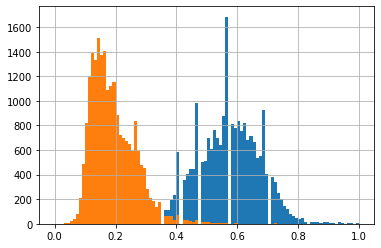

In [93]:
df['part_living_area'] = round(df['living_area'] / df['total_area'], 2)
df['part_kitchen_area'] = round(df['kitchen_area'] / df['total_area'], 2)
df['part_living_area'].hist(bins=100, range=(0, 1))
df['part_kitchen_area'].hist(bins=100, range=(0, 1))
print('Средний процент жилой площади от общей 55%, кухонной 15%, по этому принципу заполним пропуски')

In [94]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * 0.55)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * 0.15)


In [95]:
print("""Проверим есть ли где то площадь больше чем сумма площадей кухни и жилой и даже закроем глаза на то что есть еще площадь
санузлов, корридоров, нежилых помещений""")
df_err = df.query('total_area < (living_area+kitchen_area)')

print('100 квартир аномальных, проще удалить эти данные чем искать причину кто и где обсчитался')
df = df.query('total_area > (living_area+kitchen_area)')


Проверим есть ли где то площадь больше чем сумма площадей кухни и жилой и даже закроем глаза на то что есть еще площадь
санузлов, корридоров, нежилых помещений
100 квартир аномальных, проще удалить эти данные чем искать причину кто и где обсчитался


In [96]:
print("""Проверим есть ли где то площадь больше чем сумма площадей кухни и жилой 
и даже закроем глазана то что есть еще площадь санузлов, 
корридоров, нежилых помещений
""")

Проверим есть ли где то площадь больше чем сумма площадей кухни и жилой 
и даже закроем глазана то что есть еще площадь санузлов, 
корридоров, нежилых помещений



In [97]:
#is_apartment            2775 non-null object - апартаменты (булев тип)
#balcony                 12180 non-null float64 - число балконов
print("""Данные данные нам в анализе не актуальны, поэтому заполним все пропущенные значения значением False, тк скорее всего
эти кваритиры не являются апартаментами
Аналогично поступим с балконами, прудами и парками в районе 3 км ведь информацию скорее всего не указывали, тк их нет""")
df['is_apartment'] = df['is_apartment'].fillna(False)
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

Данные данные нам в анализе не актуальны, поэтому заполним все пропущенные значения значением False, тк скорее всего
эти кваритиры не являются апартаментами
Аналогично поступим с балконами, прудами и парками в районе 3 км ведь информацию скорее всего не указывали, тк их нет


In [98]:
#days_exposition         20518 non-null float64 - сколько дней было размещено объявление (от публикации до снятия)
print('Меня интересует в том числе и длительность продажи квартиры, поэтому все не закрытые объявления я уберу, тк этих данных 13%')
df.dropna(subset = ['days_exposition'], inplace = True)

Меня интересует в том числе и длительность продажи квартиры, поэтому все не закрытые объявления я уберу, тк этих данных 13%


In [99]:

print('Немного оптимизируем данные: заменим на тип int те данные где нет дробных частей и приведем текстовые данные к нижнему регистру')

df['floors_total'] = df['floors_total'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['building_series_id'] = df['building_series_id'].str.lower()
df['locality_name'] = df['locality_name'].str.lower()
df['days_exposition'] = df['days_exposition'].astype('int')


Немного оптимизируем данные: заменим на тип int те данные где нет дробных частей и приведем текстовые данные к нижнему регистру


In [100]:
#Добавим цену квадратного метра
df['metr_price'] = round(df['last_price'] / df['total_area'], 2)

In [101]:
#Добавим день недели, месяц и год

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['week_day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['first_day_exposition'] = df['first_day_exposition'].dt.date
#Время размещения объявления нам не важно



In [102]:
#этаж, на котором расположена квартира; варианты — первый, последний, другой;
def floor(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
        
df['floors_category'] = df.apply(floor, axis=1)


In [103]:
df.groupby('floors_category').agg({'metr_price': 'median'})

,metr_price
floors_category,
другой,97058.82
первый,80307.26
последний,87301.59


In [104]:
#Задание 2. Опишите выводы

In [105]:
#Каковы типичные параметры продаваемых квартир (например, площадь, цена)?  
print('Типичные параметры продаваемых квартир: площадь, цена, цена за квадратный метр, этаж')

Типичные параметры продаваемых квартир: площадь, цена, цена за квадратный метр, этаж


Построим график зависимости цены от площади:


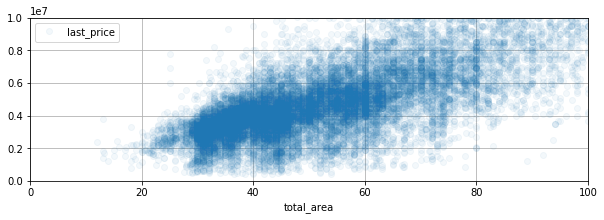

In [106]:
#Укажите наиболее важные характеристики и постройте графики.
print('Построим график зависимости цены от площади:')
df.sort_values('total_area').plot(
    x='total_area', 
    y='last_price', 
    style='o', 
    grid=True, 
    figsize=(10, 3), 
    alpha=0.05, 
    ylim=(0,10000000), 
    xlim=(0,100)
)

            total_area  last_price     floor  metr_price
total_area    1.000000    0.643067 -0.024009    0.305776
last_price    0.643067    1.000000  0.026539    0.737363
floor        -0.024009    0.026539  1.000000    0.131290
metr_price    0.305776    0.737363  0.131290    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000FAA2709320>,
      dtype=object)

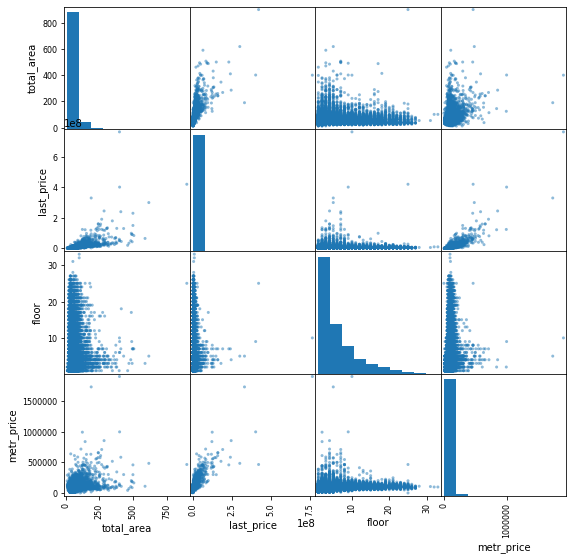

In [107]:
#сделаем матрицу с данными, описанными выше
flat_stat_multi = df.loc[:, ['total_area', 'last_price', 'floor', 'metr_price']]

print(flat_stat_multi.corr())
pd.plotting.scatter_matrix(flat_stat_multi, figsize=(9, 9))

In [108]:
print("""Из графиков выше видно что с ростом этажа: цена растет, но не значительно, цена за метр аналогично растет
                           с ростом площади: цена растет,а цена за метр тоже
                           с ростом цены: цена за метр растет почти пропорционально""")

Из графиков выше видно что с ростом этажа: цена растет, но не значительно, цена за метр аналогично растет
                           с ростом площади: цена растет,а цена за метр тоже
                           с ростом цены: цена за метр растет почти пропорционально


Построим гистограмму колличества дней, за которое продавали квартиры


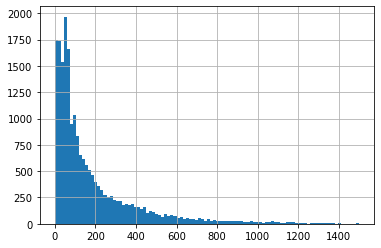

In [109]:

#Сколько обычно длится процесс продажи?
print('Построим гистограмму колличества дней, за которое продавали квартиры')
df['days_exposition'].hist(bins=100, range=(0, 1500))


В среднем люди продают квартиру за 100 дней или примерно 3 месяца


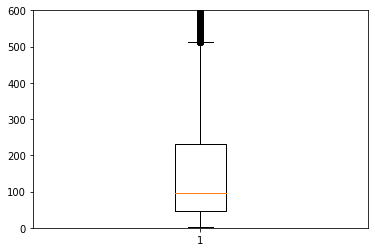

In [110]:
import matplotlib.pyplot as plt
plt.ylim(0, 600)
plt.boxplot(df['days_exposition'])
print('В среднем люди продают квартиру за 100 дней или примерно 3 месяца')

In [111]:
print('Изучим лучше такие параметры как площадь, цена, число комнат, высота потолков, число балконов и уберем анамальные данные')

Изучим лучше такие параметры как площадь, цена, число комнат, высота потолков, число балконов и уберем анамальные данные


[ 1  2  3  4  5  0  6  7  8 14 15  9 11 19 10 16 12]
Больше 8 комннатных квартир очень мало, поэтому мы их удалим


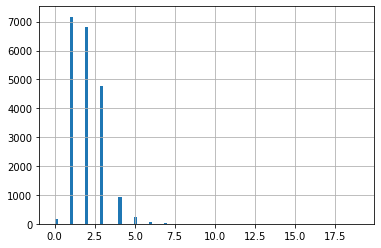

In [112]:
df['rooms'].hist(bins=100)
print(df['rooms'].unique())
print('Больше 8 комннатных квартир очень мало, поэтому мы их удалим')
df_good = df.query('rooms < 8')

12.0
900.0
Отрежем квартиры меньше 20 кв метров и больше 200 кв метров, тк их очень мало


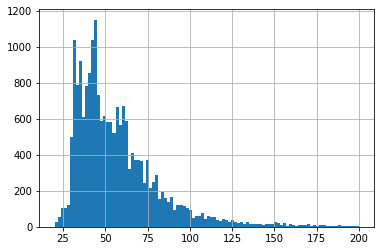

In [113]:
df['total_area'].hist(bins=100, range=(20, 200))
print(df['total_area'].min())
print(df['total_area'].max())
print('Отрежем квартиры меньше 20 кв метров и больше 200 кв метров, тк их очень мало')
df_good = df_good.query('20 < total_area < 200')

1.0
27.0
Отрежем квартиры с потолками меньше 2 метров и больше 4 метров, тк их очень мало


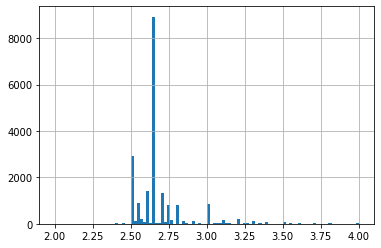

In [114]:
df['ceiling_height'].hist(bins=100, range=(2, 4))
print(df['ceiling_height'].min())
print(df['ceiling_height'].max())
print('Отрежем квартиры с потолками меньше 2 метров и больше 4 метров, тк их очень мало')
df_good = df_good.query('2 < ceiling_height < 4')

12190
763000000
Отрежем квартиры с ценой меньше 500 тысяч рублей и больше 20 миллионов рублей, тк их очень мало


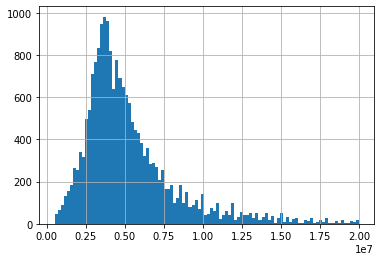

In [115]:
df['last_price'].hist(bins=100, range=(500000, 20000000))
print(df['last_price'].min())
print(df['last_price'].max())
print('Отрежем квартиры с ценой меньше 500 тысяч рублей и больше 20 миллионов рублей, тк их очень мало')
df_good = df_good.query('500000 < last_price < 20000000')

0
5
С балконами все хорошо)


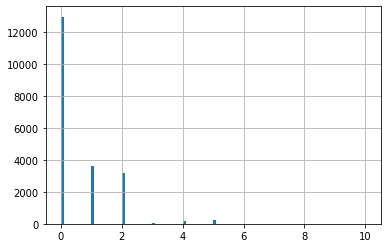

In [116]:
df['balcony'].hist(bins=100, range=(0, 10))
print(df['balcony'].min())
print(df['balcony'].max())
print('С балконами все хорошо)')

In [117]:
#print(df_good.info())
print('У нас осталась ', round(len(df_good)/len(df), 2)*100, '% хороших данных ')

У нас осталась  97.0 % хороших данных 


Еще раз посмотрим зависимости
            total_area  last_price     floor  metr_price
total_area    1.000000    0.771691 -0.029852    0.045603
last_price    0.771691    1.000000  0.094814    0.630502
floor        -0.029852    0.094814  1.000000    0.217281
metr_price    0.045603    0.630502  0.217281    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000FAA315CFD0>,
      dtype=object)

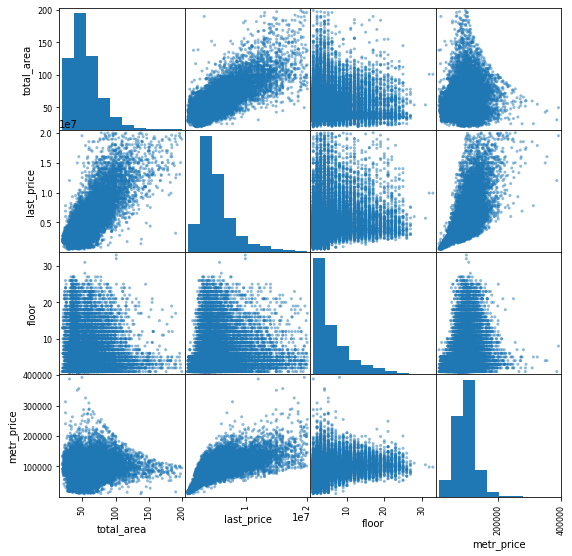

In [118]:
flat_stat_multi = df_good.loc[:, ['total_area', 'last_price', 'floor', 'metr_price']]
print('Еще раз посмотрим зависимости')
print(flat_stat_multi.corr())
pd.plotting.scatter_matrix(flat_stat_multi, figsize=(9, 9))

In [119]:
print("""Графики стали нагляднее
Из графиков выше видно что с ростом этажа: цена за метр аналогично растет
                           с ростом площади: цена растет, цена за метр незначительно падает
                           с ростом цены: цена за метр растет
                           площадь не связана с: ценой за метр и этажем""")

Графики стали нагляднее
Из графиков выше видно что с ростом этажа: цена за метр аналогично растет
                           с ростом площади: цена растет, цена за метр незначительно падает
                           с ростом цены: цена за метр растет
                           площадь не связана с: ценой за метр и этажем


Изучим зависимость цены за квадратный метр от разных параметров
                     metr_price     rooms  airports_nearest  \
metr_price             1.000000 -0.142744         -0.041672   
rooms                 -0.142744  1.000000         -0.055998   
airports_nearest      -0.041672 -0.055998          1.000000   
cityCenters_nearest   -0.394048 -0.139681          0.270648   
parks_nearest          0.104321 -0.048017         -0.087225   
ponds_nearest         -0.076162 -0.022273          0.011582   

                     cityCenters_nearest  parks_nearest  ponds_nearest  
metr_price                     -0.394048       0.104321      -0.076162  
rooms                          -0.139681      -0.048017      -0.022273  
airports_nearest                0.270648      -0.087225       0.011582  
cityCenters_nearest             1.000000      -0.060412       0.003869  
parks_nearest                  -0.060412       1.000000       0.005022  
ponds_nearest                   0.003869       0.005022 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000FAA3AE21D0>,
      dtype=object)

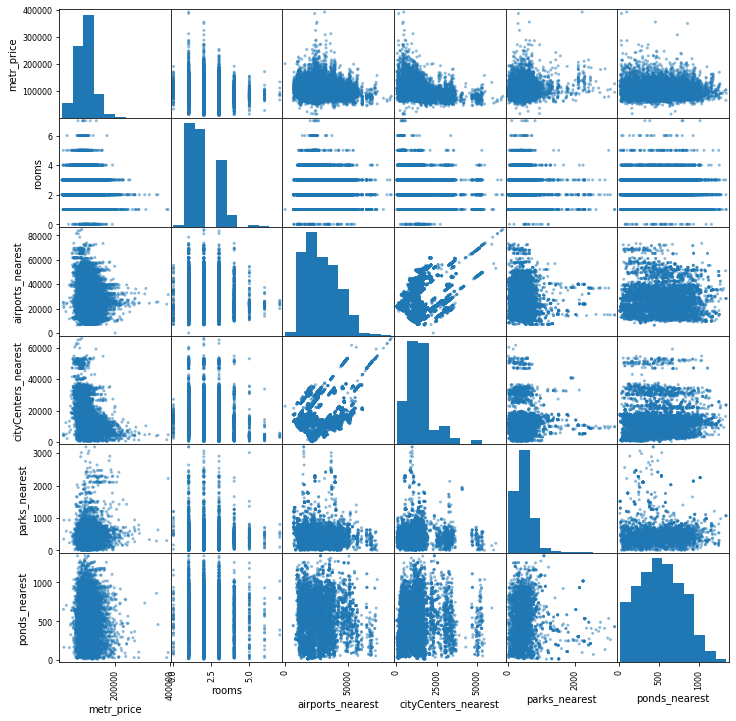

In [120]:
print('Изучим зависимость цены за квадратный метр от разных параметров')
flat_stat_metr_price = df_good.loc[:, ['metr_price', 'rooms', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']]
                                                                               
print(flat_stat_metr_price.corr())
pd.plotting.scatter_matrix(flat_stat_metr_price, figsize=(12, 12))


In [121]:
print("""Цена за квадратный метр становится ниже: чем дальше от центра находится квартира и чем больше в ней комнат
От других параметров цена почти не зависит""")

Цена за квадратный метр становится ниже: чем дальше от центра находится квартира и чем больше в ней комнат
От других параметров цена почти не зависит


In [122]:
#print(df_good.head())
print('Посмотрим зависимость цены за квадратный метр от этажа (первого или последнего) и даты размещения: дня недели, месяца и года')

Посмотрим зависимость цены за квадратный метр от этажа (первого или последнего) и даты размещения: дня недели, месяца и года


                 metr_price
floors_category            
другой             96451.61
первый             79957.36
последний          86250.00


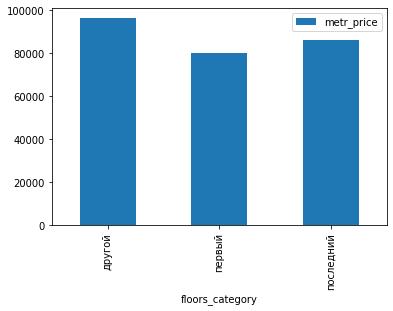

In [123]:
data_pivot_floors_category = df_good.pivot_table(index='floors_category', values='metr_price', aggfunc='median')
data_pivot_floors_category.plot(y='metr_price', kind ='bar')
print(data_pivot_floors_category)

          metr_price
week_day            
0          93159.610
1          93516.130
2          93676.815
3          93572.415
4          92968.750
5          92356.690
6          92753.620


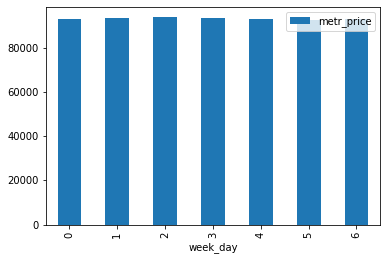

In [124]:
data_pivot_week_day = df_good.pivot_table(index='week_day', values ='metr_price', aggfunc='median')
data_pivot_week_day.plot(y='metr_price', kind ='bar')
print(data_pivot_week_day)

       metr_price
month            
1       93669.870
2       93283.580
3       93023.260
4       92105.260
5       91673.090
6       91341.830
7       93250.025
8       95000.000
9       94852.580
10      93537.410
11      93758.620
12      91666.670


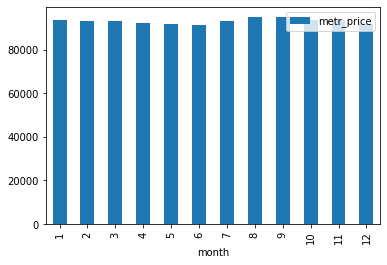

In [125]:
data_pivot_month = df_good.pivot_table(index='month', values ='metr_price', aggfunc='median')
data_pivot_month.plot(y='metr_price', kind ='bar')
print(data_pivot_month)

      metr_price
year            
2014   102373.20
2015    91185.72
2016    90748.25
2017    91463.41
2018    95000.00
2019   103058.13


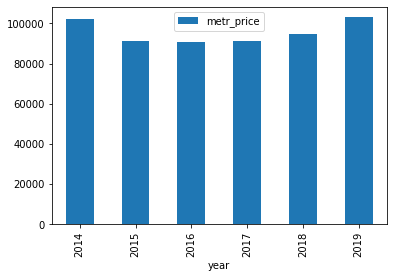

In [126]:
data_pivot_year = df_good.pivot_table(index='year', values ='metr_price', aggfunc='median')
data_pivot_year.plot(y='metr_price', kind ='bar')
print(data_pivot_year)

In [127]:
print("""Зависимость цены кв метра от этажа: на первом этаже квартиры дешевле всего, а квартиры с пометкой "другой" самые дорогие
Квадратный метр квартир, чье объявление разместили со понедельника по четверг примерно на 1000 р дороже остальных
В мае и июне размещаются самые дешевый метр, в августе и сентябре самый дорогой, разница примерно 2000 р
В 2015 году цены на квадратный метр резко упали, так же резко выросли в 2019 году""")

Зависимость цены кв метра от этажа: на первом этаже квартиры дешевле всего, а квартиры с пометкой "другой" самые дорогие
Квадратный метр квартир, чье объявление разместили со понедельника по четверг примерно на 1000 р дороже остальных
В мае и июне размещаются самые дешевый метр, в августе и сентябре самый дорогой, разница примерно 2000 р
В 2015 году цены на квадратный метр резко упали, так же резко выросли в 2019 году


In [128]:
#Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. 
#Эти данные можно отличить по имени в столбце 'locality_name'.
data_pivot_locality_name = df_good.pivot_table(index='locality_name', values ='metr_price', aggfunc='count')
#возьмем 11 первых значений, тк там будет Санкт-Петербург
data_pivot_locality_name = data_pivot_locality_name.sort_values(by = 'metr_price', ascending = False)
print(data_pivot_locality_name.head(11))

                   metr_price
locality_name                
санкт-петербург         12892
посёлок мурино            505
посёлок шушары            405
всеволожск                328
колпино                   306
посёлок парголово         300
пушкин                    296
деревня кудрово           294
гатчина                   263
выборг                    201
петергоф                  171


In [129]:
#создадим словарь с этими населенными пунктами
list_country = ['посёлок мурино',
        'посёлок шушары', 
        'всеволожск', 
        'колпино', 
        'пушкин', 
        'посёлок парголово', 
        'деревня кудрово',
        'гатчина',
        'выборг',
        'петергоф']
df_prigorod = df_good.query('locality_name in @list_country')
#перепишем data_pivot_locality_name
data_pivot_locality_name = df_prigorod.pivot_table(index='locality_name', 
                                                   values =['metr_price', 'cityCenters_nearest'], 
                                                   aggfunc='median')
data_pivot_locality_name = data_pivot_locality_name.sort_values(by = 'metr_price', ascending = False)
print(data_pivot_locality_name)

                   cityCenters_nearest  metr_price
locality_name                                     
пушкин                         27909.0   97607.845
деревня кудрово                    NaN   91930.235
посёлок парголово              19301.5   91387.360
посёлок мурино                     NaN   85714.290
петергоф                       33058.0   80952.380
посёлок шушары                 24168.5   75949.370
колпино                        31982.0   74005.090
гатчина                            NaN   67073.170
всеволожск                         NaN   65613.405
выборг                             NaN   57377.050


In [130]:
print("""Пушкин находится примерно в 10км от КАДа, но тем не менее лидирует по ценам за квадратный метр, видимо это хороший город
Пригородные населенные пункты с 2 по 7 место находятся либо в пределах КАД, либо в непосредственной близости с ним
Остальные города находятся дальше от КАДа с чем связана их низкая стоимость цены за квадратный метр""")

Пушкин находится примерно в 10км от КАДа, но тем не менее лидирует по ценам за квадратный метр, видимо это хороший город
Пригородные населенные пункты с 2 по 7 место находятся либо в пределах КАД, либо в непосредственной близости с ним
Остальные города находятся дальше от КАДа с чем связана их низкая стоимость цены за квадратный метр


Проверим еще раз Пушкин
Гистограмма обычная, поэтому оставим предыдущие выводы


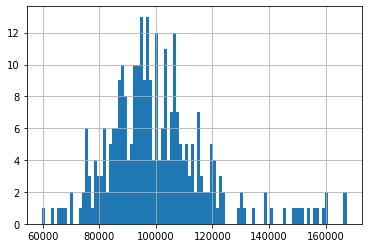

In [131]:
print('Проверим еще раз Пушкин')
df_pushkin = df_good.query('"пушкин" in locality_name')
df_pushkin['metr_price'].hist(bins=100)
print('Гистограмма обычная, поэтому оставим предыдущие выводы')

Выделим сегменты до 7000 м, от 7000 м до 20000 м, от 20000 м до 38000 м, дальше 38000 м


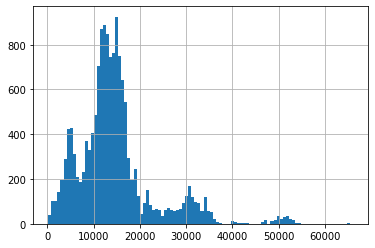

In [132]:
#Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра.
#Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений.
#Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

df_cityCenters = df_good
df_cityCenters.dropna(subset = ['cityCenters_nearest'], inplace = True)
df_cityCenters['cityCenters_nearest'].hist(bins=100)
print('Выделим сегменты до 7000 м, от 7000 м до 20000 м, от 20000 м до 38000 м, дальше 38000 м')

df_cityCenters_7 = df_cityCenters.query('cityCenters_nearest < 7000')
df_cityCenters_20 = df_cityCenters.query('7000 <= cityCenters_nearest < 20000')
df_cityCenters_38 = df_cityCenters.query('20000 <= cityCenters_nearest < 38000')
df_cityCenters_more = df_cityCenters.query('38000 <= cityCenters_nearest')


            total_area  last_price     floor  metr_price
total_area    1.000000    0.705321  0.005584   -0.323678
last_price    0.705321    1.000000  0.141802    0.390163
floor         0.005584    0.141802  1.000000    0.195392
metr_price   -0.323678    0.390163  0.195392    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000FAA38455C0>,
      dtype=object)

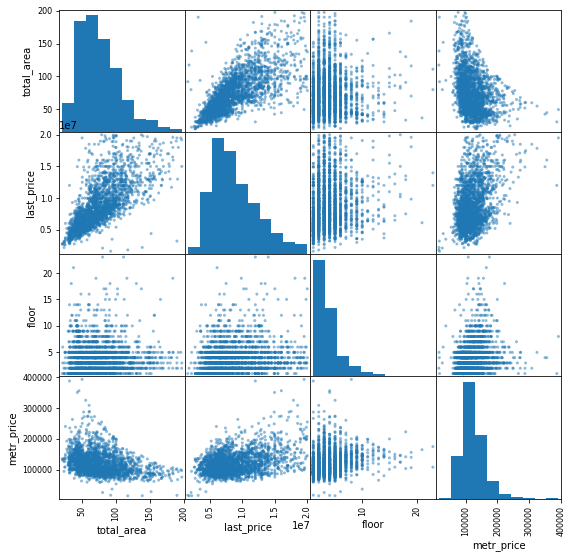

In [133]:
#В пределах 7000
flat_stat_7 = df_cityCenters_7.loc[:, ['total_area', 'last_price', 'floor', 'metr_price']]

print(flat_stat_7.corr())
pd.plotting.scatter_matrix(flat_stat_7, figsize=(9, 9))

In [134]:
print("""В пределах 7000 м
Из графиков выше видно что с ростом этажа: общая цена и цена за метр немного растет
                           с ростом площади: цена растет, цена за метр падает
                           с ростом цены: цена за метр растет
                           площадь не связана с: этажем""")

В пределах 7000 м
Из графиков выше видно что с ростом этажа: общая цена и цена за метр немного растет
                           с ростом площади: цена растет, цена за метр падает
                           с ростом цены: цена за метр растет
                           площадь не связана с: этажем


            total_area  last_price     floor  metr_price
total_area    1.000000    0.838126  0.041745   -0.026596
last_price    0.838126    1.000000  0.126183    0.488627
floor         0.041745    0.126183  1.000000    0.204922
metr_price   -0.026596    0.488627  0.204922    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000FAA384A7F0>,
      dtype=object)

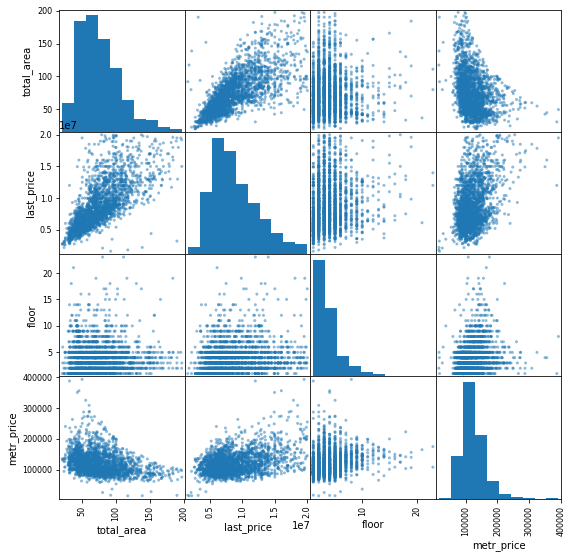

In [135]:
#В пределах 20000
flat_stat_20 = df_cityCenters_20.loc[:, ['total_area', 'last_price', 'floor', 'metr_price']]

print(flat_stat_20.corr())
pd.plotting.scatter_matrix(flat_stat_7, figsize=(9, 9))

In [136]:
print("""В пределах 20000 м
Из графиков выше видно что с ростом этажа: общая цена и цена за метр немного растет
                           с ростом площади: цена растет, цена за метр падает
                           с ростом цены: цена за метр растет
                           площадь не связана с: этажем""")

В пределах 20000 м
Из графиков выше видно что с ростом этажа: общая цена и цена за метр немного растет
                           с ростом площади: цена растет, цена за метр падает
                           с ростом цены: цена за метр растет
                           площадь не связана с: этажем


            total_area  last_price     floor  metr_price
total_area    1.000000    0.800387  0.011888   -0.123647
last_price    0.800387    1.000000  0.047136    0.457457
floor         0.011888    0.047136  1.000000    0.091617
metr_price   -0.123647    0.457457  0.091617    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000FAA6799208>,
      dtype=object)

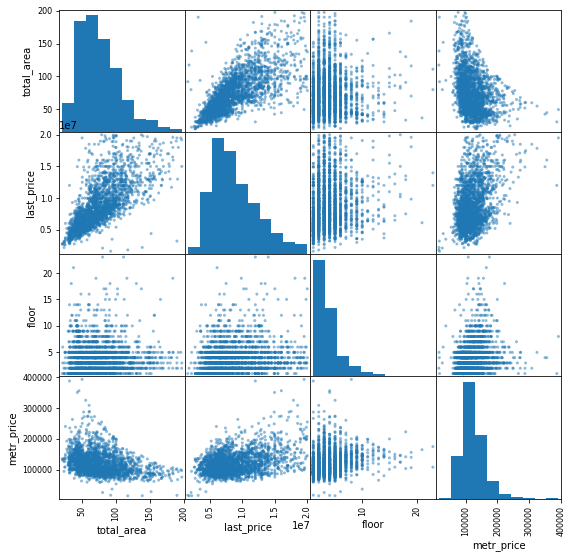

In [137]:
#В пределах 38000
flat_stat_38 = df_cityCenters_38.loc[:, ['total_area', 'last_price', 'floor', 'metr_price']]

print(flat_stat_38.corr())
pd.plotting.scatter_matrix(flat_stat_7, figsize=(9, 9))

In [138]:
print("""В пределах 38000 м
Из графиков выше видно что с ростом этажа: общая цена и цена за метр слабо меняются в большую сторону
                           с ростом площади: цена растет, цена за метр немного падает
                           с ростом цены: цена за метр растет
                           площадь не связана с: этажем""")

В пределах 38000 м
Из графиков выше видно что с ростом этажа: общая цена и цена за метр слабо меняются в большую сторону
                           с ростом площади: цена растет, цена за метр немного падает
                           с ростом цены: цена за метр растет
                           площадь не связана с: этажем


            total_area  last_price     floor  metr_price
total_area    1.000000    0.838907  0.060770   -0.188023
last_price    0.838907    1.000000  0.088289    0.323248
floor         0.060770    0.088289  1.000000    0.046883
metr_price   -0.188023    0.323248  0.046883    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000FAA7999198>,
      dtype=object)

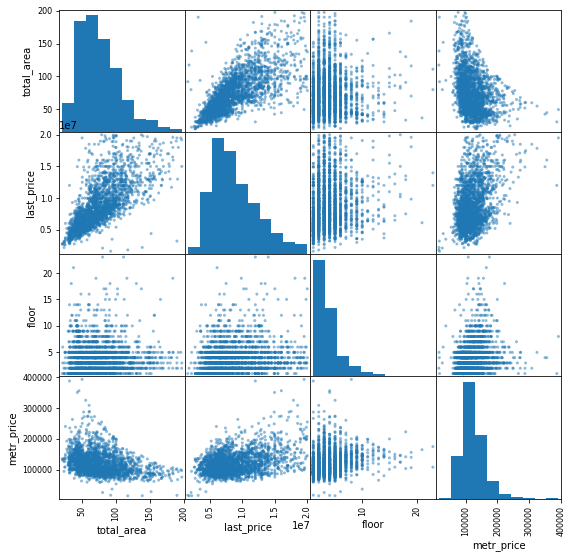

In [139]:
#Дальше 38000 м 
flat_stat_more = df_cityCenters_more.loc[:, ['total_area', 'last_price', 'floor', 'metr_price']]

print(flat_stat_more.corr())
pd.plotting.scatter_matrix(flat_stat_7, figsize=(9, 9))

In [140]:
print("""Дальше 38000 м
Из графиков выше видно что с ростом этажа: общая цена и цена за метр почти не меняются
                           с ростом площади: цена растет, цена за метр немного падает
                           с ростом цены: цена за метр растет
                           площадь не связана с: этажем""")

Дальше 38000 м
Из графиков выше видно что с ростом этажа: общая цена и цена за метр почти не меняются
                           с ростом площади: цена растет, цена за метр немного падает
                           с ростом цены: цена за метр растет
                           площадь не связана с: этажем


In [141]:
print('Получается чем дальше дом от центра, тем меньше растет цена и соответсвенно цена за метр с ростом этажа')

Получается чем дальше дом от центра, тем меньше растет цена и соответсвенно цена за метр с ростом этажа


In [142]:
#Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. 
#Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.
print(""""Наиболее характерные параметры для апартаментов, студий и квартир свободной планировки:
'Площадь, цена, цена за квадратный метр, этаж""")
#print(df_good.head())

"Наиболее характерные параметры для апартаментов, студий и квартир свободной планировки:
'Площадь, цена, цена за квадратный метр, этаж


In [143]:
print('Проверим пересекаются ли  у апартаментов, студий и квартир свободной планировки и типовой планировки значения')

Проверим пересекаются ли  у апартаментов, студий и квартир свободной планировки и типовой планировки значения


In [144]:
df_apartment = df_good.query('is_apartment == True')
print(df_apartment.query('studio == True'))
print(df_apartment.query('open_plan == True'))

Empty DataFrame
Columns: [building_series_id, total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, area, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, part_living_area, part_kitchen_area, metr_price, week_day, month, year, floors_category]
Index: []
Empty DataFrame
Columns: [building_series_id, total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, area, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, part_living_area, part_kitchen_area, metr_price, week_day, month, year, floors_category]
Index: []


In [145]:
df_studio = df_good.query('studio == True')
print(df_studio.query('is_apartment == True'))
print(df_studio.query('open_plan == True'))

Empty DataFrame
Columns: [building_series_id, total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, area, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, part_living_area, part_kitchen_area, metr_price, week_day, month, year, floors_category]
Index: []
Empty DataFrame
Columns: [building_series_id, total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, area, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, part_living_area, part_kitchen_area, metr_price, week_day, month, year, floors_category]
Index: []


In [146]:
df_open_plan = df_good.query('open_plan == True')
print(df_open_plan.query('is_apartment == True'))
print(df_open_plan.query('studio == True'))

Empty DataFrame
Columns: [building_series_id, total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, area, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, part_living_area, part_kitchen_area, metr_price, week_day, month, year, floors_category]
Index: []
Empty DataFrame
Columns: [building_series_id, total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, area, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, part_living_area, part_kitchen_area, metr_price, week_day, month, year, floors_category]
Index: []


In [147]:
print('Не пересекаются')

Не пересекаются


In [148]:
#Добавим столбец с типами квартир
def type(data):
    if data['is_apartment'] == True:
        return 'апартаменты'
    elif data['studio'] == True:
        return 'студия'
    elif data['open_plan'] == True:
        return 'св планировка'
    else:
        return 'тип планировка'
        
df_good['type_of_flat'] = df_good.apply(type, axis=1)

df_type_pivot = df_good.pivot_table(index='type_of_flat', 
                                    values=['metr_price', 'total_area', 'last_price', 'ceiling_height'], 
                                    aggfunc='median')
print(df_type_pivot)

                ceiling_height  last_price  metr_price  total_area
type_of_flat                                                      
апартаменты               2.80     5500000  112782.000      53.100
св планировка             2.65     3377500  115065.705      28.025
студия                    2.65     3350000  124074.070      27.000
тип планировка            2.65     5000000   99596.750      51.600


In [149]:
print("""Высота потолков в апартаментах выше в среднем на 15 см
Апартаменты и квартиры с типичной планировкой в среднем на 20 млн дороже чем студи и квартиры свободной планировки
Цена за метр ниже всего в типовых квартирах, в студиях дороже всего
Квартиры студии и св планировки в основном небольшие, в отличае от апартаментов и типовых квартир""")

Высота потолков в апартаментах выше в среднем на 15 см
Апартаменты и квартиры с типичной планировкой в среднем на 20 млн дороже чем студи и квартиры свободной планировки
Цена за метр ниже всего в типовых квартирах, в студиях дороже всего
Квартиры студии и св планировки в основном небольшие, в отличае от апартаментов и типовых квартир


In [150]:
#Общие выводы

print("""
ОБЩИЕ ВЫВОДЫ

Зависимость типичных параметров квартир(этаж, площадь, цена, цена за метр):
                           с ростом этажа: цена за метр аналогично растет
                           с ростом площади: цена растет, цена за метр незначительно падает
                           с ростом цены: цена за метр растет
                           площадь не связана с: ценой за метр и этажем

В среднем люди продают квартиру за 100 дней или примерно 3 месяца

Цена за квадратный метр становится ниже: чем дальше от центра находится квартира и чем больше в ней комнат
От других параметров(удаленность от аэропортов, парков, прудов) цена за квадрадный почти не зависит

Анализ населенных пунктов с наибольщим числом объявлений:
-Пушкин находится примерно в 10км от КАДа, но тем не менее лидирует по ценам за квадратный метр, видимо это хороший город
-Пригородные населенные пункты с 2 по 7 место находятся либо в пределах КАД, либо в непосредственной близости с ним
-Остальные города находятся дальше от КАДа с чем связана их низкая стоимость цены за квадратный метр

Чем дальше дом от центра Санкт-Петербурга, тем меньше растет цена и соответсвенно цена за квадратный метр с ростом этажа                           

Сравнение апартаментов, студий, квартир со свободной и типовой планировками:
-Высота потолков в апартаментах выше в среднем на 15 см
-Апартаменты и квартиры с типичной планировкой в среднем на 20 млн дороже чем студи и квартиры свободной планировки
-Цена за метр ниже всего в типовых квартирах, в студиях дороже всего
-Квартиры студии и св планировки в основном небольшие, в отличае от апартаментов и типовых квартир
""")


ОБЩИЕ ВЫВОДЫ

Зависимость типичных параметров квартир(этаж, площадь, цена, цена за метр):
                           с ростом этажа: цена за метр аналогично растет
                           с ростом площади: цена растет, цена за метр незначительно падает
                           с ростом цены: цена за метр растет
                           площадь не связана с: ценой за метр и этажем

В среднем люди продают квартиру за 100 дней или примерно 3 месяца

Цена за квадратный метр становится ниже: чем дальше от центра находится квартира и чем больше в ней комнат
От других параметров(удаленность от аэропортов, парков, прудов) цена за квадрадный почти не зависит

Анализ населенных пунктов с наибольщим числом объявлений:
-Пушкин находится примерно в 10км от КАДа, но тем не менее лидирует по ценам за квадратный метр, видимо это хороший город
-Пригородные населенные пункты с 2 по 7 место находятся либо в пределах КАД, либо в непосредственной близости с ним
-Остальные города находятся дальше от